<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# 1.1 load file as dictionary

filepath = './sat_scores.csv'

rows = []
with open(filepath, 'r') as f: 
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
f.close()
data = {key:[ele[i] for ele in rows[1:]] for i, key in enumerate(rows[0])}
pprint.pprint (data)

{'Math': ['510',
          '513',
          '515',
          '505',
          '516',
          '499',
          '499',
          '506',
          '500',
          '501',
          '499',
          '510',
          '499',
          '489',
          '501',
          '488',
          '474',
          '526',
          '499',
          '527',
          '499',
          '515',
          '510',
          '517',
          '525',
          '515',
          '542',
          '439',
          '539',
          '512',
          '542',
          '553',
          '542',
          '589',
          '550',
          '545',
          '572',
          '589',
          '580',
          '554',
          '568',
          '561',
          '577',
          '562',
          '596',
          '550',
          '570',
          '603',
          '582',
          '599',
          '551',
          '514'],
 'Rate': ['82',
          '81',
          '79',
          '77',
          '72',
          '71',
          '71',
   

In [3]:

f = open(filepath, 'r')
print (f)
read = csv.reader(f)
print (read)

<_io.TextIOWrapper name='./sat_scores.csv' mode='r' encoding='cp1252'>


### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
### 1.2.a Make DataFrame object

df = pd.DataFrame(data)
print (df.dtypes)

df2 = pd.read_csv(filepath)
print (df2.dtypes)

### The elements are in their proper data types instead of just objects like from using DataFrame

State     object
Rate      object
Verbal    object
Math      object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
df2.head(10)


State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
data_dict = {
    
    'name': df2.columns,
    'variable type': [ele for ele in df2.dtypes],
    'description': "SAT Participatiom Rate of the different States in USA and its average 'Verbal' and 'Math' scores",
    'shape': df2.shape
}

pprint.pprint (data_dict)


{'description': 'SAT Participatiom Rate of the different States in USA and its '
                "average 'Verbal' and 'Math' scores",
 'name': Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object'),
 'shape': (52, 4),
 'variable type': [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

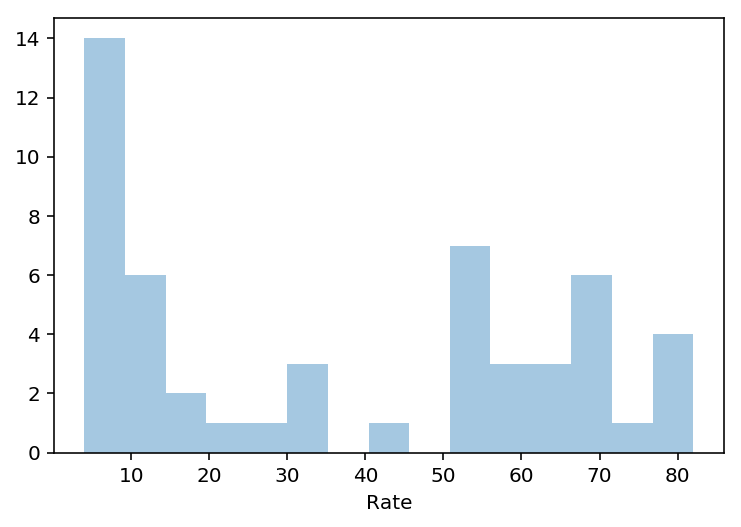

In [7]:
import seaborn as sns

# 3.1.1 plot of 'Rate'

sns.distplot(df2['Rate'], bins=15, kde=False)

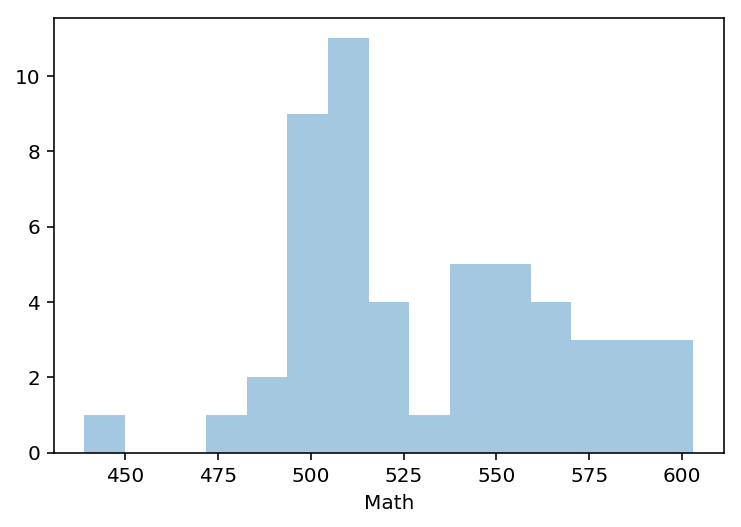

In [8]:
# 3.1.2 plot of 'Math'
sns.distplot(df2['Math'], bins=15, kde=False)

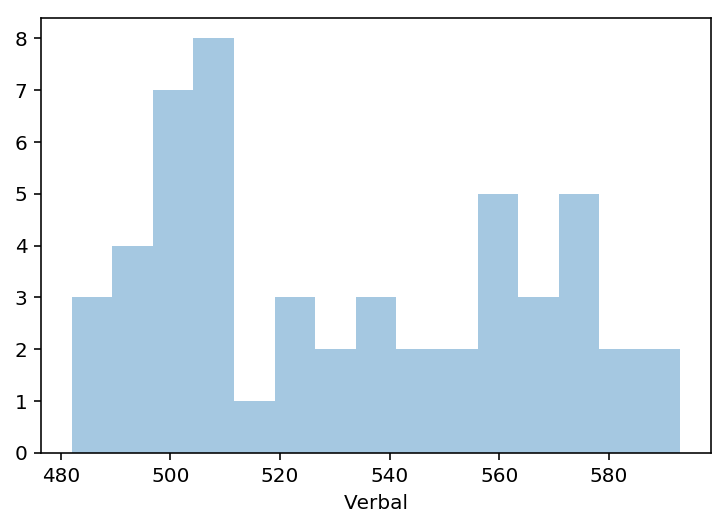

In [9]:
# 3.1.3 plot of 'Verbal'
sns.distplot(df2['Verbal'], bins=15, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

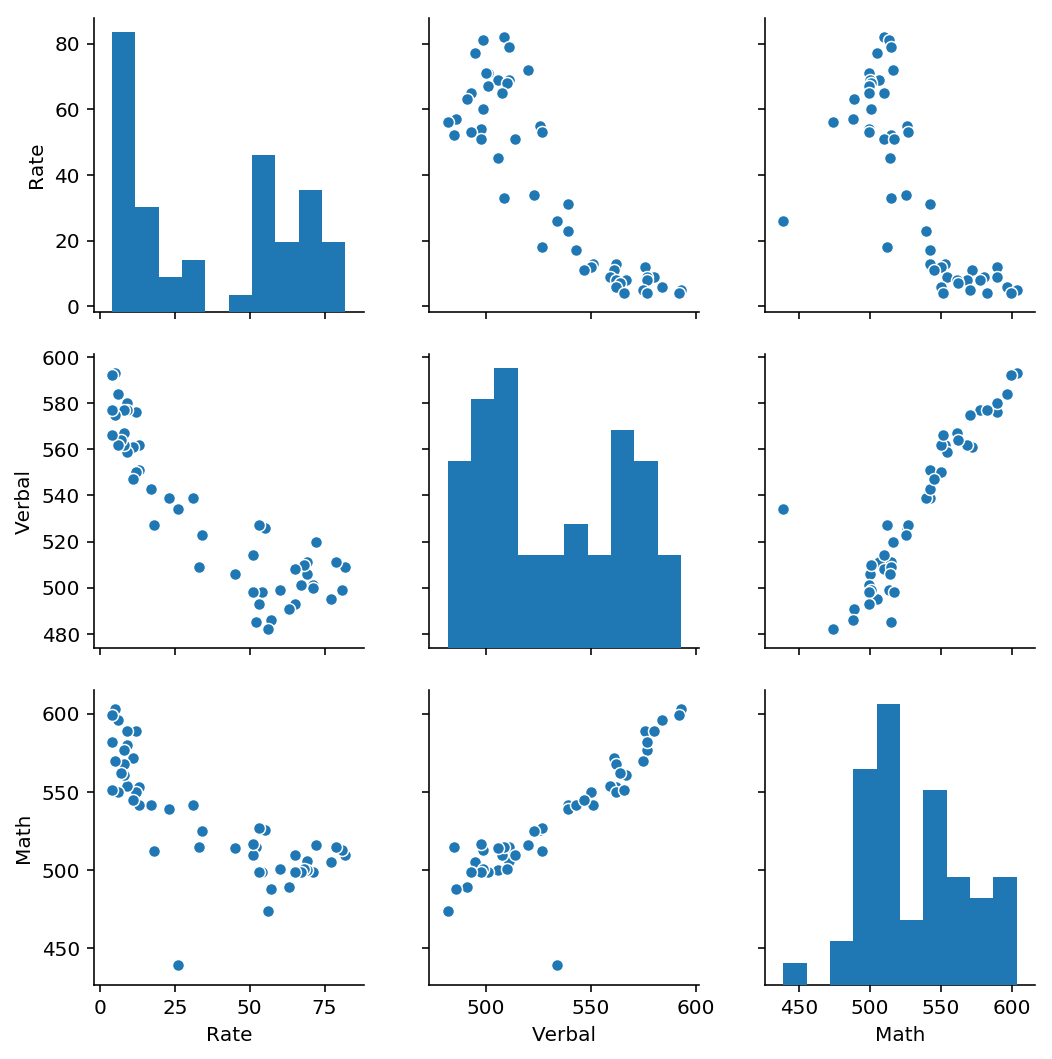

In [10]:
# 3.2 use pairplot
sns.pairplot(df2)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

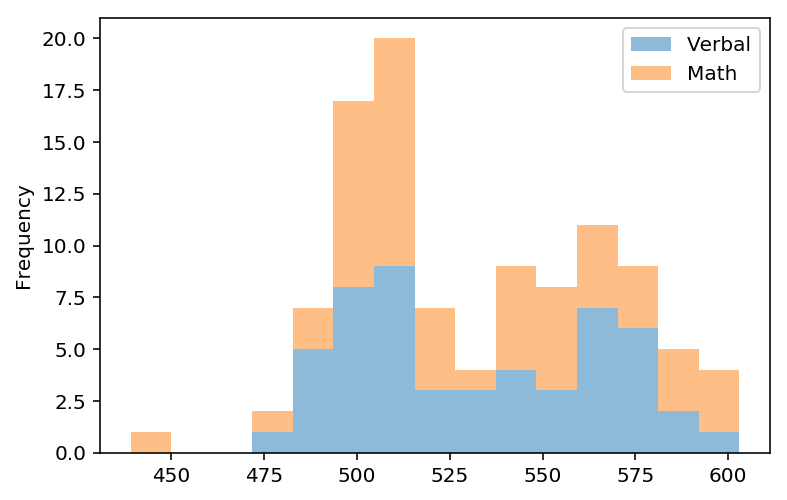

In [11]:
# 4.1 Plot a stacked histogram with Verbal and Math using pandas
df2[['Verbal','Math']].plot(kind='hist',bins=15,stacked=True,alpha=0.5)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

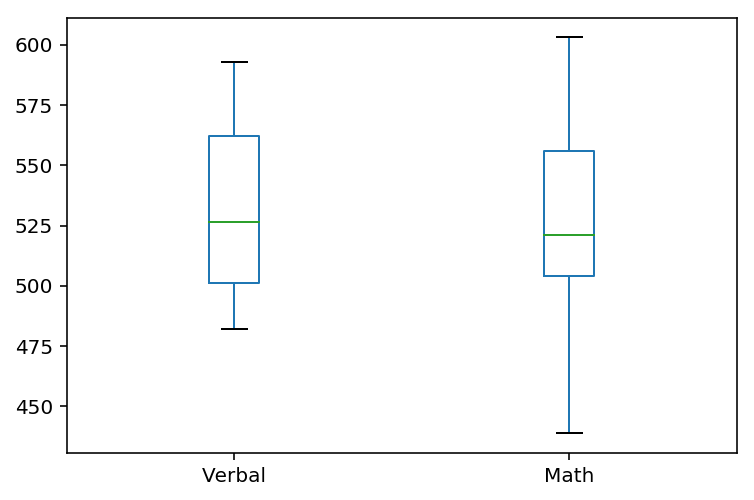

In [12]:
# 4.2 Plot Verbal and Math on the same chart using boxplots
df2[['Verbal','Math']].plot(kind='box')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


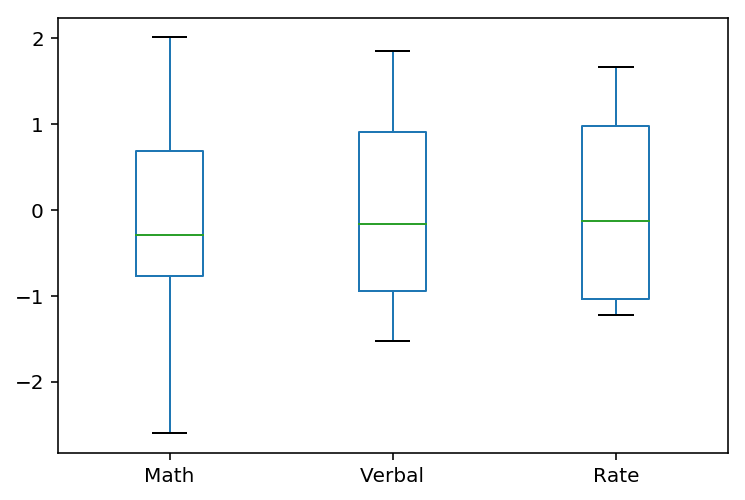

In [13]:
### 4.3 Plot Verbal, Math, and Rate appropriately on the same boxplot chart
df3 = df2.copy(deep=True)

### Standardize them by minusing it with its mean and dividing it by its standard deviation
df3 = df3[['Math','Verbal','Rate']].apply(lambda score : (score - np.mean(score)) / np.std(score))
df3.plot.box()





<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [14]:
import matplotlib.pyplot as plt
df5 = df2.copy(deep=True)
df5.dtypes
df5 = df5[df5['Verbal'] > np.mean(df5['Verbal'])]
print (df5.shape)




print (df5.count(), df2.median(), df2.mean())

(24, 4)
State     24
Rate      24
Verbal    24
Math      24
dtype: int64 Rate       33.5
Verbal    526.5
Math      521.0
dtype: float64 Rate       37.153846
Verbal    532.019231
Math      531.500000
dtype: float64


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [15]:
### 5.2 Find the list of states that have Verbal scores greater than the median of Verbal scores across states
df6 = df2.copy(deep=True)

df6 = df6[df6['Verbal'] > np.median(df6['Verbal'])]

print (df6.shape)
df6 
# There are 2 more entries than compared to 5.1. The distribution of Verbal scores of the list of states is skewed.

(26, 4)


State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [16]:
### 5.3 Create a column that is the difference between the Verbal and Math scores
df7 = df2.copy(deep=True)

df7['V-M Difference'] = df7['Verbal'] - df7['Math']
df7

State  Rate  Verbal  Math  V-M Difference
0     CT    82     509   510              -1
1     NJ    81     499   513             -14
2     MA    79     511   515              -4
3     NY    77     495   505             -10
4     NH    72     520   516               4
5     RI    71     501   499               2
6     PA    71     500   499               1
7     VT    69     511   506               5
8     ME    69     506   500               6
9     VA    68     510   501               9
10    DE    67     501   499               2
11    MD    65     508   510              -2
12    NC    65     493   499              -6
13    GA    63     491   489               2
14    IN    60     499   501              -2
15    SC    57     486   488              -2
16    DC    56     482   474               8
17    OR    55     526   526               0
18    FL    54     498   499              -1
19    WA    53     527   527               0
20    TX    53     493   499              -6
21    HI    52     485   515             -30
22    AK    51     514   510               4
23    CA    51     498   517             -19
24    AZ    34     523   525              -2
25    NV    33     509   515              -6
26    CO    31     539   542              -3
27    OH    26     534   439              95
28    MT    23     539   539               0
29    WV    18     527   512              15
30    ID    17     543   542               1
31    TN    13     562   553               9
32    NM    13     551   542               9
33    IL    12     576   589             -13
34    KY    12     550   550               0
35    WY    11     547   545               2
36    MI    11     561   572             -11
37    MN     9     580   589              -9
38    KS     9     577   580              -3
39    AL     9     559   554               5
40    NE     8     562   568              -6
41    OK     8     567   561               6
42    MO     8     577   577               0
43    LA     7     564   562               2
44    WI     6     584   596             -12
45    AR     6     562   550              12
46    UT     5     575   570               5
47    IA     5     593   603             -10
48    SD     4     577   582              -5
49    ND     4     592   599              -7
50    MS     4     566   551              15
51   All    45     506   514              -8

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [17]:
### 5.4 Create two new DataFrames showing states with the greatest difference between scores
df8 = df7.copy(deep=True)

df_verbal_greater = df8.sort_values('V-M Difference',ascending = False).head(10)
df_verbal_greater 

df_math_greater = df8.sort_values('V-M Difference').head(10)
df_math_greater

print ('Part 1: \n {verbal} \nPart 2: \n {math}'.format(verbal=df_verbal_greater.head(3), math=df_math_greater.head(3)))

Part 1: 
    State  Rate  Verbal  Math  V-M Difference
27    OH    26     534   439              95
50    MS     4     566   551              15
29    WV    18     527   512              15 
Part 2: 
    State  Rate  Verbal  Math  V-M Difference
21    HI    52     485   515             -30
23    CA    51     498   517             -19
1     NJ    81     499   513             -14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [18]:
### 6.1 Create the correlation matrix of your variables (excluding State).
df9 = df2.copy(deep=True)
df9.pop('State')

df9
cor_matrix = df9.corr()
cor_matrix

### The matrix tells us that all the variables are strongly correlated in the order:
### Verbal - Math
### Verbal - Rate
### Rate - Math

Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [19]:
### 6.2 Use pandas'  .describe() built-in function on your DataFrame
df10 = df2.copy(deep=True)
df10.describe()

Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [20]:
### 6.3 Assign and print the covariance matrix for the dataset
df11 = df2.copy(deep=True)

cov_matrix = df11.cov()
cov_matrix 

### 1. Refer to point 3
### 2. Divide covariance by the product of the standard deviation of the two variables
### 3. Correlation have an abosolute range of -1 to 1 whereby the closer |Correlation Coefficient| tends to 1 the stronger the relationship
###    Covariance doesn't give this information as it's not scaled down. Makes it difficult to compare between different variables

Rate       Verbal         Math
Rate    745.387632  -804.355958  -760.803922
Verbal -804.355958  1104.646682  1077.147059
Math   -760.803922  1077.147059  1297.078431

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [21]:
### 7.1 Loading new data
filepath = './drug-use-by-age.csv'

df_drug = pd.read_csv(filepath)

df_drug['crack-frequency']

df_drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [22]:
### 7.1 cont. there are dashes in the data. Since those dashes mainly fall under the extreme age groups and mostly belong to illegal narcotics category it is safe to replace them with 0s
### For example, it is highly unlikely for a meth user to be alive at 65 years old

### Searches each cell and replace '-' with 0
for col in df_drug.columns: 
    for row in df_drug.index.values: 
        if df_drug.loc[row, col] == '-':
            df_drug.loc[row, col] = 0 

            
### Turn columns into float
df_drug[[col for col in df_drug.columns[1:]]] = df_drug[[col for col in df_drug.columns[1:]]].astype(float)

df_drug

age       n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798.0          3.9                3.0            1.1   
1      13  2757.0          8.5                6.0            3.4   
2      14  2792.0         18.1                5.0            8.7   
3      15  2956.0         29.2                6.0           14.5   
4      16  3058.0         40.1               10.0           22.5   
5      17  3038.0         49.3               13.0           28.0   
6      18  2469.0         58.7               24.0           33.7   
7      19  2223.0         64.6               36.0           33.4   
8      20  2271.0         69.7               48.0           34.0   
9      21  2354.0         83.2               52.0           33.0   
10  22-23  4707.0         84.2               52.0           28.4   
11  24-25  4591.0         83.1               52.0           24.9   
12  26-29  2628.0         80.7               52.0           20.8   
13  30-34  2864.0         77.5               52.0           16.4   
14  35-49  7391.0         75.0               52.0           10.4   
15  50-64  3923.0         67.2               52.0            7.3   
16    65+  2448.0         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                0.0        0.0   

    crack-frequency         ...          oxycontin-use  oxycontin-frequency  \
0               0.0         ...                    0.1                 24.5   
1               3.0         ...                    0.1                 41.0   
2               0.0         ...                    0.4                  4.5   
3               9.5         ...                    0.8                  3.0   
4               1.0         ...                    1.1                  4.0   
5              21.0         ...                    1.4                  6.0   
6              10.0         ...                    1.7                  7.0   
7               2.0         ...                    1.5                  7.5   
8               5.0         ...                    1.7                 12.0   
9              17.0         ...                    1.3                 13.5   
10              5.0         ...                    1.7                 17.5   
11              6.0         ...                    1.3                 20.0   
12              6.0         ...                    1.2                 13.5   
13             15.0         ...                    0.9                 46.0   
14             48.0         ...                    0.3                 12.0   
15             62.0         ...                    0.4                  5.0   
16              0.0         ...                    0.0                  0.0   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2              

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

##### A: In general alcohol have the highest % of the population using it. This is likely due to the fact that alcohol is not usually identified as a drug by the masses. Furthermore, availability of alcohol is likely another factor for the drug's high usage, since the second highest % usage drug, Marijuana is also relatively available and legal in the US. 

##### A: Drug usage seems to peak around ages 20-30. Though, utility related drugs (oxycontin & tranquilizer) doesn't follow this observation as much.

##### A: Seems that the '35-49' can be further split into 3 age groups for better representation. It data might be slightly weighted to a big age group range as of the current dataset


In [23]:
import seaborn as sns

### Pairplot of all the variables. Due to long load time required, it is commented out
# sns.pairplot(df_drug)

In [24]:
### Pairplot of drug-use  to its frequency. Due to long load time required, it is commented out
# sns.pairplot(df_drug, 
#              x_vars = [col for col in df_drug.columns[3::2]], 
#              y_vars = [col for col in df_drug.columns[2::2]])

In [25]:
df_drug.get_dtype_counts()

float64    27
object      1
dtype: int64

In [26]:
df_drug.describe()

n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          17.000000  17.000000   
mean             42.941176     2.176471           7.411765   0.294118   
std              18.362566     1.816772           8.014119   0.235772   
min               4.000000     0.000000           0.000000   0.000000   
25%              30.000000     0.500000           5.000000   0.000000   
50%              52.000000     2.000000           5.000000   0.400000   
75%              52.000000     4.000000           7.000000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack-frequency  heroin-use         ...          oxycontin-use  \
count        17.000000   17.000000         ...              17.000000   
mean         12.382353    0.352941         ...               0.935294   
std          17.361532    0.333762         ...               0.608216   
min           0.000000    0.000000         ...               0.000000   
25%           2.000000    0.100000         ...               0.400000   
50%           6.000000    0.200000         ...               1.100000   
75%          15.000000    0.600000         ...               1.400000   
max          62.000000    1.100000         ...               1.700000   

       oxycontin-frequency  tranquilizer-use  tranquilizer-frequency  \
count            17.000000         17.000000               17.000000   
mean             13.941176          2.805882               11.735294   
std              12.902134          1.753379               11.485205   
min               0.000000          0.200000                4.500000   
25%               5.000000          1.400000                6.000000   
50%              12.000000          3.500000               10.000000   
75%              17.500000          4.200000               11.000000   
max              46.000000          5.400000               52.000000   

       stimulant-use  stimulant-frequency   meth-use  meth-frequency  \
count      17.000000            17.000000  17.000000       17.000000   
mean        1.917647            31.147059   0.382353       31.735294   
std         1.407673            85.973790   0.262762       32.206423   
min         0.000000             2.000000   0.000000        0.000000   
25%         0.600000             7.000000   0.200000       10.500000   
50%         1.800000            10.000000   0.400000       24.000000   
75%         3.000000            12.000000   0.600000       46.000000   
max         4.100000           364.000000   0.900000      105.000000   

       sedative-use  sedative-frequency  
count     17.000000           17.000000  
mean       0.282353           19.382353  
std        0.138000           24.833527  
min        0.000000            3.000000  
25%        0.200000            6.500000  
50%        0.300000           10.000000  
75%        0.400000           17.500000  
max        0.500000          104.000000  

[8 rows x 27 columns]

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

##### EDA: Is there a correlation between Marijuana usage and other non-utility drugs (except alcohol)? 

Non-utility drug list: 

marijuana,
cocaine,
crack,
heroin,
hallucinogen,
inhalant,
meth,

###### Non-utility drugs = non-prescripted contraband drugs

Hypothesis: There should be a positive correlation since the ways of obtaining marijuana are similar to the ways of obtaining these contraband items. 

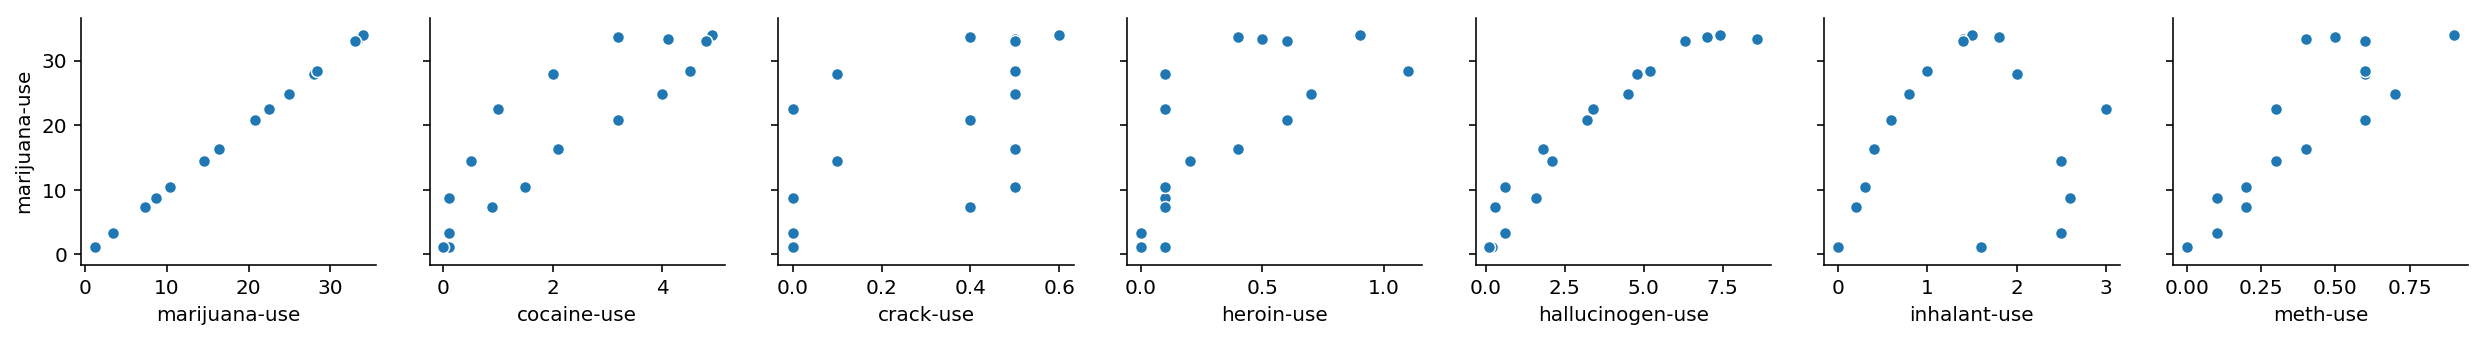

In [27]:
# Code
df_drug1 = df_drug.copy(deep=True)


drug_list_col = ['marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','meth-use']


sns.pairplot(df_drug1, 
            x_vars= [col for col in df_drug1 if col in drug_list_col],
            y_vars= [drug_list_col[0]])



In [28]:
### Finding Person correlation between Marijuana use against other drug use
df_drug1[[col for col in df_drug1 if col in drug_list_col]].corr()['marijuana-use']

marijuana-use       1.000000
cocaine-use         0.883789
crack-use           0.620670
heroin-use          0.711613
hallucinogen-use    0.959353
inhalant-use        0.127336
meth-use            0.870446
Name: marijuana-use, dtype: float64

In [29]:
### Finding Spearman correlation between Marijuana use against other drug use
df_drug1[[col for col in df_drug1 if col in drug_list_col]].corr(method='spearman')['marijuana-use']

marijuana-use       1.000000
cocaine-use         0.898591
crack-use           0.672246
heroin-use          0.760567
hallucinogen-use    0.979767
inhalant-use        0.136196
meth-use            0.854706
Name: marijuana-use, dtype: float64

**Report**

In general, there is a strong correlation between use of marijuana and other contraband drugs likely due to the fact that they can usually be sourced together. 

Regardless, 2 of the drugs deviates slightly from the group, Crack(cocaine) and Inhalant:
For Inhalant, it might be due to the fact that the 'drug' is readily availble in markers, ink, glue etc. Making it accessible to even children. Hence, one does not need to be resourceful to obtain the 'drug 
For Crack, since Crack is an inferior form of Cocaine, users with lower purchasing power will obtain Crack, while those with higher will obtain Cocaine. Since quality Marijuana cost more towards the high side, this observation is to be expected. 

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [30]:
# Question 8 written response
"""
1) Using the univariate boxplot method, there are no significant outliers observed
2) Yes there are outliers. For the purpose of this dataset, outliers are:
    2.1) Values that differ too greatly such that the difference between the value of the variable and its estimate(calculated using the outputs from a regression with another highly correlated variable) will be identified as an outlier in an univariate boxplot 
3) See below
4) Removed. See below
5) Mean decreased for all of the stats
    Minor changes in median
    Minor changes for standard deviation, except for Math, whose standard deviation lowered by around to 4%
"""

'\n1) Using the univariate boxplot method, there are no significant outliers observed\n2) Yes there are outliers. For the purpose of this dataset, outliers are:\n    2.1) Values that differ too greatly such that the difference between the value of the variable and its estimate(calculated using the outputs from a regression with another highly correlated variable) will be identified as an outlier in an univariate boxplot \n3) See below\n4) Removed. See below\n5) Mean decreased for all of the stats\n    Minor changes in median\n    Minor changes for standard deviation, except for Math, whose standard deviation lowered by around to 4%\n'

In [31]:
dfs = pd.read_csv('./sat_scores.csv')


# Reimagining the variables as vectors on a hyperplane. Create new table with magnitude of the vectors 'Rate' & 'Verbal'
# 'Math' is not included as it is observed as the one with the outlier from the pairplot below
dfs['Sqrt'] = np.sqrt(dfs['Rate']**2 + dfs['Verbal']**2)
dfs.drop(51, axis=0).describe()
dfs

State  Rate  Verbal  Math        Sqrt
0     CT    82     509   510  515.562799
1     NJ    81     499   513  505.531404
2     MA    79     511   515  517.070595
3     NY    77     495   505  500.953092
4     NH    72     520   516  524.960951
5     RI    71     501   499  506.005929
6     PA    71     500   499  505.015841
7     VT    69     511   506  515.637470
8     ME    69     506   500  510.682876
9     VA    68     510   501  514.513362
10    DE    67     501   499  505.460186
11    MD    65     508   510  512.141582
12    NC    65     493   499  497.266528
13    GA    63     491   489  495.025252
14    IN    60     499   501  502.594270
15    SC    57     486   488  489.331176
16    DC    56     482   474  485.242208
17    OR    55     526   526  528.867658
18    FL    54     498   499  500.919155
19    WA    53     527   527  529.658380
20    TX    53     493   499  495.840700
21    HI    52     485   515  487.779663
22    AK    51     514   510  516.523959
23    CA    51     498   517  500.604634
24    AZ    34     523   525  524.103997
25    NV    33     509   515  510.068623
26    CO    31     539   542  539.890730
27    OH    26     534   439  534.632584
28    MT    23     539   539  539.490500
29    WV    18     527   512  527.307311
30    ID    17     543   542  543.266049
31    TN    13     562   553  562.150336
32    NM    13     551   542  551.153336
33    IL    12     576   589  576.124986
34    KY    12     550   550  550.130894
35    WY    11     547   545  547.110592
36    MI    11     561   572  561.107833
37    MN     9     580   589  580.069823
38    KS     9     577   580  577.070186
39    AL     9     559   554  559.072446
40    NE     8     562   568  562.056937
41    OK     8     567   561  567.056435
42    MO     8     577   577  577.055457
43    LA     7     564   562  564.043438
44    WI     6     584   596  584.030821
45    AR     6     562   550  562.032028
46    UT     5     575   570  575.021739
47    IA     5     593   603  593.021079
48    SD     4     577   582  577.013865
49    ND     4     592   599  592.013513
50    MS     4     566   551  566.014134
51   All    45     506   514  507.997047

In [32]:
# 8.1 Pull Rate

dfr = dfs.drop(51, axis=0)['Rate']
plt.boxplot(dfr);
dfr

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
Name: Rate, dtype: int64

In [33]:
import seaborn as sns 

# 8.2 checking for outliers
# From the graphs, plots with 'Math' seems to be the ones with distinct outliers. 

sns.pairplot(dfs)

In [34]:
# 8.3 / 8.4 Finding and removing outliers

import statsmodels.formula.api as sm


# Deep copy of original dataframe, to avoid data integrity issues
dfs1 = dfs.copy(deep=True)

# Dropping row 51 which is the average value - a derivative value that is not useful in this situation
dfs1.drop(51, axis=0, inplace=True)

# Run regression of y = Math, x = magnitude of hyperplane
# Using magnitude of vectors 'Rate' and 'Verbal' as it carries the information of the variables in the dataset
result = sm.ols(formula='Math ~ Sqrt', data= dfs1).fit()

# Pulling out the constant and slope information to construction a linear equation with y as 'Math' 
constant = result.params.Intercept
slope = result.params.Sqrt

# Deriving the estimate 'Math' values based on the linear equation constructed above
dfs1['Est.Math'] = (dfs1['Sqrt'] * slope) + constant

# Finding the difference between the reported and estimated 'Math' scores
dfs1['Est.Error'] = dfs1['Est.Math'] - dfs1['Math']


# Getting the quartile range of the estimated errors 
UpperQ = np.percentile(dfs1['Est.Error'], 75)
LowerQ = np.percentile(dfs1['Est.Error'], 25)

# For every row drop the row if 'Est.Error' fails the univariate boxplot method
index = []

for row in dfs1.index.values: 
    if dfs1.loc[row, 'Est.Error'] > (UpperQ - LowerQ) * 1.5 + UpperQ or dfs1.loc[row, 'Est.Error'] < LowerQ - (UpperQ - LowerQ) *1.5:
        dfs1.drop(row, axis=0, inplace=True)
        index += [row]
sns.pairplot(dfs1, x_vars=['Math'], y_vars=['Est.Math'])

# Print outliers removed
dfs.loc[index]

State  Rate  Verbal  Math        Sqrt
21    HI    52     485   515  487.779663
27    OH    26     534   439  534.632584

Rate      Verbal        Math
count  49.000000   49.000000   49.000000
mean   36.918367  533.469388  534.081633
std    27.990204   33.336105   34.366188
min     4.000000  482.000000  474.000000
25%     9.000000  501.000000  505.000000
50%    33.000000  527.000000  526.000000
75%    65.000000  562.000000  561.000000
max    82.000000  593.000000  603.000000

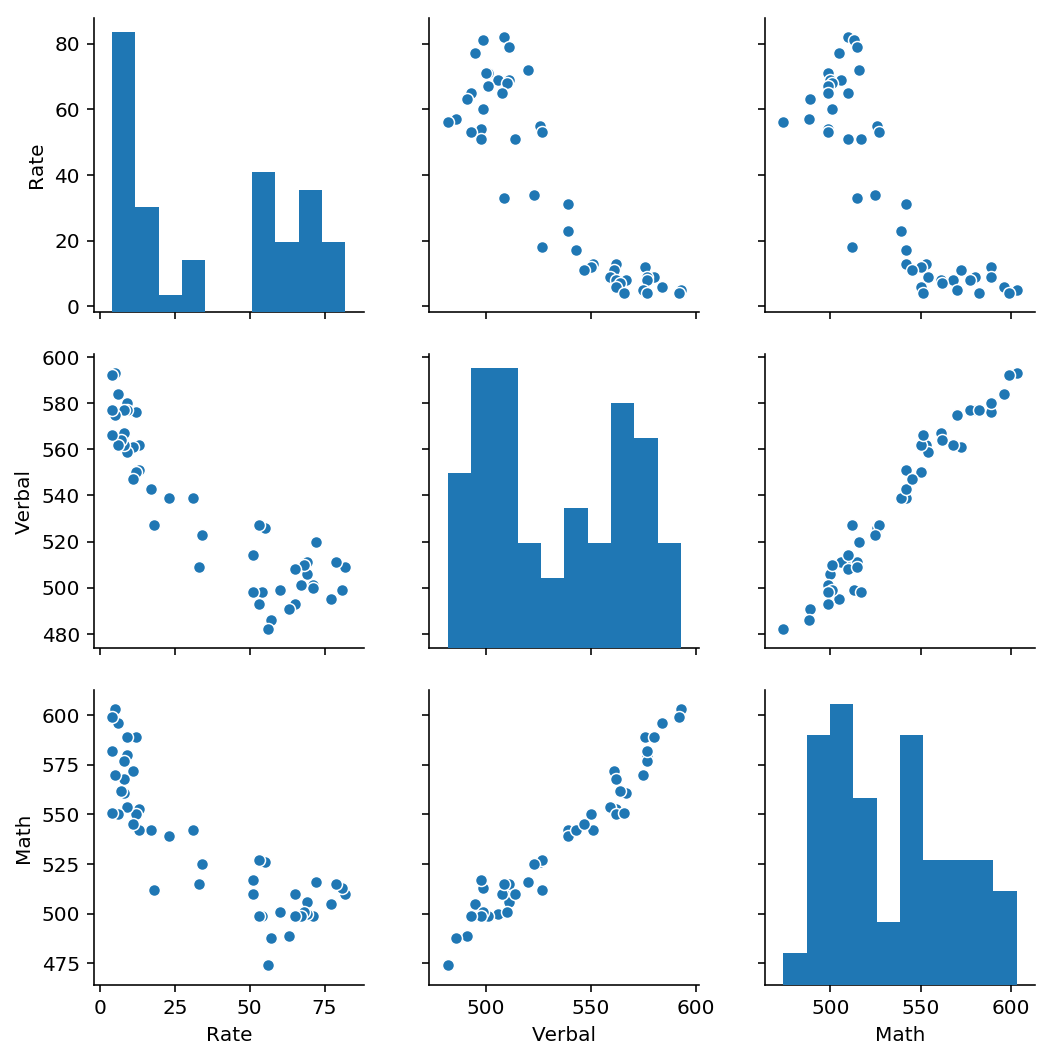

In [35]:
dfs1.drop(['Sqrt','Est.Math','Est.Error'], axis=1, inplace=True)

# Plot pairs
sns.pairplot(dfs1)

# Print stats of cleaned data
dfs1.describe()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [36]:
import scipy.stats as stats

### 9.1 Calculate the spearman correlation of sat Verbal and Math

dfs2 = dfs.copy(deep=True)

spearman = dfs2[['Verbal','Math']].corr(method='spearman')
pearson = dfs2[['Verbal','Math']].corr()

print (spearman, pearson)

np.corrcoef([dfs2['Verbal'], dfs2['Math'], dfs2['Rate']])

### Spearman correlation first ranks its variable to itself (not too dissimilar to how percentile ranking works). It then finds the correlation of its rankings to churn out a value

          Verbal      Math
Verbal  1.000000  0.905205
Math    0.905205  1.000000           Verbal      Math
Verbal  1.000000  0.899871
Math    0.899871  1.000000


array([[ 1.        ,  0.89987085, -0.88643214],
       [ 0.89987085,  1.        , -0.77374621],
       [-0.88643214, -0.77374621,  1.        ]])

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [37]:
from scipy import stats


dfs3 = dfs.copy(deep=True)

dfs3['RateP'] = [stats.percentileofscore(dfs3['Rate'], ele) for ele in dfs3['Rate']]

dfs3[['Rate', 'RateP']].corr(method='spearman')
"""
For each element, it assigns a percentile ordinally according to the rank of the said element in the dataset
In doing so, it is similar to how Spearman ranking works. A Spearman correlation is essentially taking the correlation of the percentile score of 2 variables
"""

dfs3[dfs3['State'] == 'CA']

State  Rate  Verbal  Math        Sqrt      RateP
23    CA    51     498   517  500.604634  56.730769

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

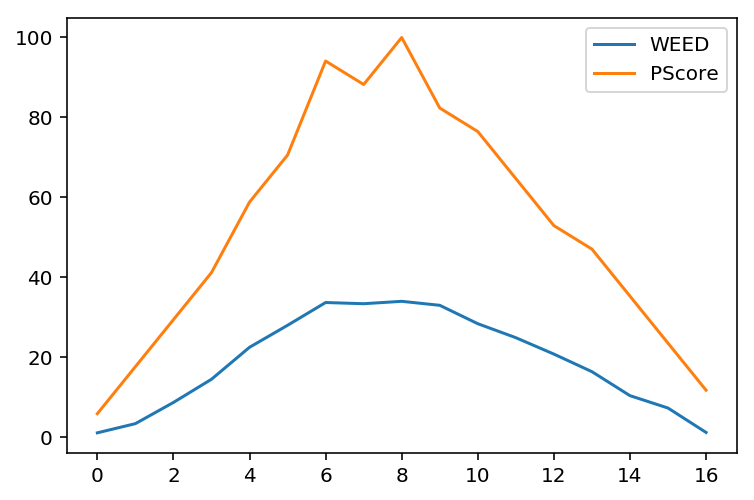

In [38]:
df_drug2 = df_drug.copy(deep=True)

df_drug2 = pd.DataFrame(df_drug2['marijuana-use'])

df_drug2['PScore'] = [stats.percentileofscore(df_drug2['marijuana-use'], ele) for ele in df_drug2['marijuana-use']]

df_drug2.rename({'marijuana-use':'WEED'}, axis=1, inplace=True)

df_drug2['WEED'].plot()
df_drug2['PScore'].plot()
plt.legend()

# Describe the effect: 
# Percentile scoring accentuates the distribution, making the shape of the distribution more distinct
# By giving the data an ordinal scale, it also help easier rank identification of an element